<a href="https://colab.research.google.com/github/Birajpokharel11/AI-Ford-data/blob/master/Another_copy_of_Mock_assessment_Group3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mock assessment (group task)

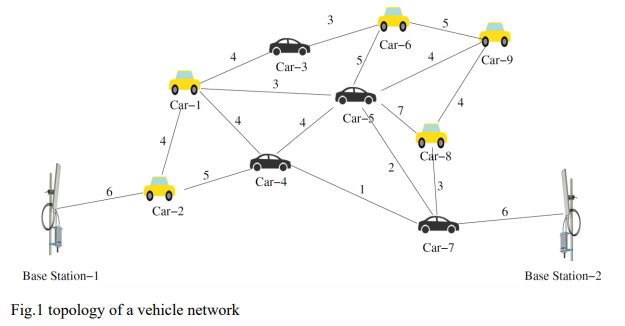

**Optimization problem:** please find the optimal routing path from Car-9 to any of the base stations having the maximum end-to-end transmission rate.



In [ ]:
import heapq
import random
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Given graph representing the network
graph = {
    "Car-1": {"Car-2": 4, "Car-4": 4, "Car-3": 4, "Car-5": 3},
    "Car-2": {"Car-4": 5, "Car-1": 4, "Base Station-1": 6},
    "Car-3": {"Car-1": 4, "Car-6": 3},
    "Car-4": {"Car-1": 4, "Car-2": 5, "Car-7": 1, "Car-5": 4},
    "Car-5": {"Car-7": 2, "Car-8": 7, "Car-9": 4, "Car-6": 5, "Car-1": 3, "Car-4": 4},
    "Car-6": {"Car-5": 5, "Car-3": 3, "Car-9": 5},
    "Car-7": {"Base Station-2": 6, "Car-8": 3, "Car-5": 2, "Car-4": 1},
    "Car-8": {"Car-7": 3, "Car-5": 7, "Car-9": 4},
    "Car-9": {"Car-8": 4, "Car-6": 5, "Car-5": 4},
    "Base Station-1": {"Car-2": 6},
    "Base Station-2": {"Car-7": 6}
}


# Using Dijkstra's Algorithm

Optimal path from Car-5 to a base station: ['Car-5', 'Car-1', 'Car-2', 'Base Station-1'], Maximum end-to-end transmission rate: 3 Mbps


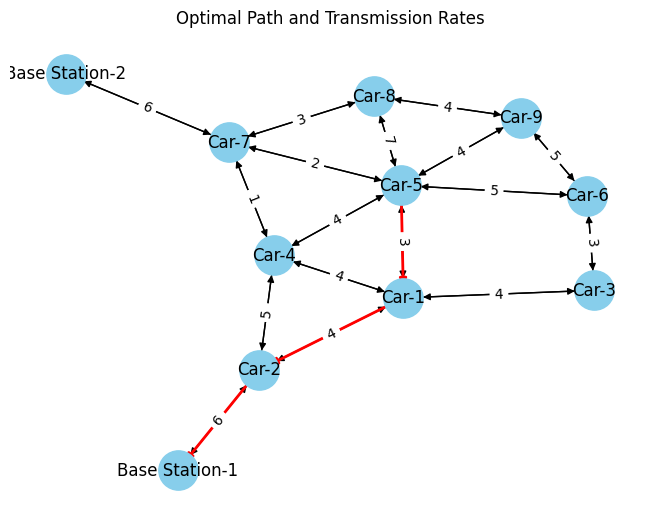

In [ ]:
def dijkstra(graph, start, end):
    """
    Perform Dijkstra's algorithm to find the shortest path from the start node to the end node.

    Parameters:
    - graph: Dictionary representing the weighted graph
    - start: Starting node
    - end: Target node

    Returns:
    - Shortest path from start to end
    """
    # Priority queue to explore nodes with the lowest cost first
    queue = [(0, start, [])]
    visited = set()

    while queue:
        (cost, node, path) = heapq.heappop(queue)
        if node not in visited:
            visited.add(node)
            path = path + [node]

            if node == end:
                return path

            # Explore neighbors and update the queue with the total cost
            for neighbor, c in graph[node].items():
                heapq.heappush(queue, (cost + c, neighbor, path))

    return None

# Example usage:
start_node = 'Car-5'
end_nodes = ['Base Station-2','Base Station-1']

max_transmission_rate = float('-inf')  # Initialize with negative infinity
optimal_path = None

# Iterate over each end node to find the optimal path and maximum transmission rate
for end_node in end_nodes:
    # Find the shortest path from start to the current end node using Dijkstra's algorithm
    path = dijkstra(graph, start_node, end_node)

    # Calculate the maximum transmission rate along the path
    path_transmission_rates = [graph[path[i]][path[i + 1]] for i in range(len(path) - 1)]
    current_max_rate = min(path_transmission_rates)

    # Update the optimal path and maximum transmission rate if the current path has a higher rate
    if current_max_rate > max_transmission_rate:
        max_transmission_rate = current_max_rate
        optimal_path = path

# Print the optimal path and maximum transmission rate
print(f"Optimal path from {start_node} to a base station: {optimal_path}, Maximum end-to-end transmission rate: {max_transmission_rate} Mbps")


# Plot the graph with the optimal path highlighted
G = nx.DiGraph(graph)

# Position nodes using a spring layout for a more visually appealing result
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_weight='normal', node_size=800, node_color='skyblue')

# Highlight the optimal path in red
edges = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

# Add labels to the edges with transmission rates
labels = {(edge[0], edge[1]): graph[edge[0]][edge[1]] for edge in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Show the plot
plt.title('Optimal Path and Transmission Rates')
plt.show()

# Using Genetic Algorithm


In [ ]:
import pandas as pd
import networkx as nx

# Replace 'path/to/your/file.csv' with the actual path to your CSV file
csv_file_path = 'path/to/your/file.csv'
df = pd.read_csv('data_file.csv')

# Function to calculate Euclidean distance between two points
def calculate_distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

# Calculate distances and store in car_distances_dict
car_distances_dict = {}

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    source_car = f'Car_{int(row["No."])}'
    car_distances_dict[source_car] = {}

    # Calculate distances to other cars
    for other_index, other_row in df.iterrows():
        if index != other_index:
            destination_car = f'Car_{int(other_row["No."])}'
            distance = calculate_distance(row['x'], row['y'], other_row['x'], other_row['y'])

            # Convert distance to 0 if it's greater than or equal to 6000 meters
            distance = 0 if distance >= 6000 else distance

            # Add to the dictionary only if the distance is not 0
            if distance != 0:
                car_distances_dict[source_car][destination_car] = distance

    # Calculate distances to base stations
    base_station_1_distance = calculate_distance(row['x'], row['y'], -1, -1)
    base_station_2_distance = calculate_distance(row['x'], row['y'], 56325, 9)

    # Convert distances to 0 if they're greater than or equal to 6000 meters
    base_station_1_distance = 0 if base_station_1_distance >= 6000 else base_station_1_distance
    base_station_2_distance = 0 if base_station_2_distance >= 6000 else base_station_2_distance

    # Add to the dictionary only if the distance is not 0
    if base_station_1_distance != 0:
        car_distances_dict[source_car]['Base_Station_1'] = base_station_1_distance

    if base_station_2_distance != 0:
        car_distances_dict[source_car]['Base_Station_2'] = base_station_2_distance

# Append distances from Base Station 1 to all cars
car_distances_dict['Base_Station_1'] = {car: distances['Base_Station_1'] for car, distances in car_distances_dict.items() if 'Base_Station_1' in distances}

# Append distances from Base Station 2 to all cars
car_distances_dict['Base_Station_2'] = {car: distances['Base_Station_2'] for car, distances in car_distances_dict.items() if 'Base_Station_2' in distances}

# Remove entries with a value of 0
car_distances_dict = {car: distances for car, distances in car_distances_dict.items() if any(val != 0 for val in distances.values())}

# Create a graph using NetworkX
G2 = nx.Graph()
for i, j in car_distances_dict.items():
  print(i,j)
# Add nodes and edges to the graph based on distances
for car, distances in car_distances_dict.items():
    G2.add_node(car)
    for destination, distance in distances.items():
        G2.add_edge(car, destination, weight=distance)

# Find and print the shortest paths to Base Station 1 and Base Station 2 for all cars
for source_node in df['No.']:
    source_node = f'Car_{int(source_node)}'
    shortest_path_to_base_station_1 = nx.shortest_path(G2, source=source_node, target='Base_Station_1', weight='weight')
    shortest_path_to_base_station_2 = nx.shortest_path(G2, source=source_node, target='Base_Station_2', weight='weight')

    print(f"Shortest path from {source_node} to Base Station 1: {shortest_path_to_base_station_1}")
    print(f"Shortest path from {source_node} to Base Station 2: {shortest_path_to_base_station_2}")


Car_1 {'Car_2': 1400.1263777213621, 'Car_3': 3300.807622960825, 'Car_4': 3701.63455356241, 'Car_5': 4102.583770562924, 'Car_6': 4202.802820684817, 'Car_7': 4803.1053773261165, 'Car_8': 5603.688349586997, 'Car_51': 300.94137813697205, 'Car_52': 1801.5318099257042, 'Car_53': 2801.9005842331458, 'Car_54': 4702.413212774751, 'Base_Station_1': 9.212094116520971}
Car_2 {'Car_1': 1400.1263777213621, 'Car_3': 1900.68132091287, 'Car_4': 2301.5091313521693, 'Car_5': 2702.458372064858, 'Car_6': 2802.676721769383, 'Car_7': 3402.979040207959, 'Car_8': 4203.563127798813, 'Car_9': 5003.749530268907, 'Car_51': 1099.1907995667434, 'Car_52': 401.4074718391587, 'Car_53': 1401.7749353269392, 'Car_54': 3302.2868592456084, 'Car_55': 4602.73554183139, 'Car_56': 5803.194805790136, 'Base_Station_1': 1401.1429049497247}
Car_3 {'Car_1': 3300.807622960825, 'Car_2': 1900.68132091287, 'Car_4': 400.8338076845223, 'Car_5': 801.7804095422007, 'Car_6': 901.9957412621801, 'Car_7': 1502.2977659097742, 'Car_8': 2302.88372

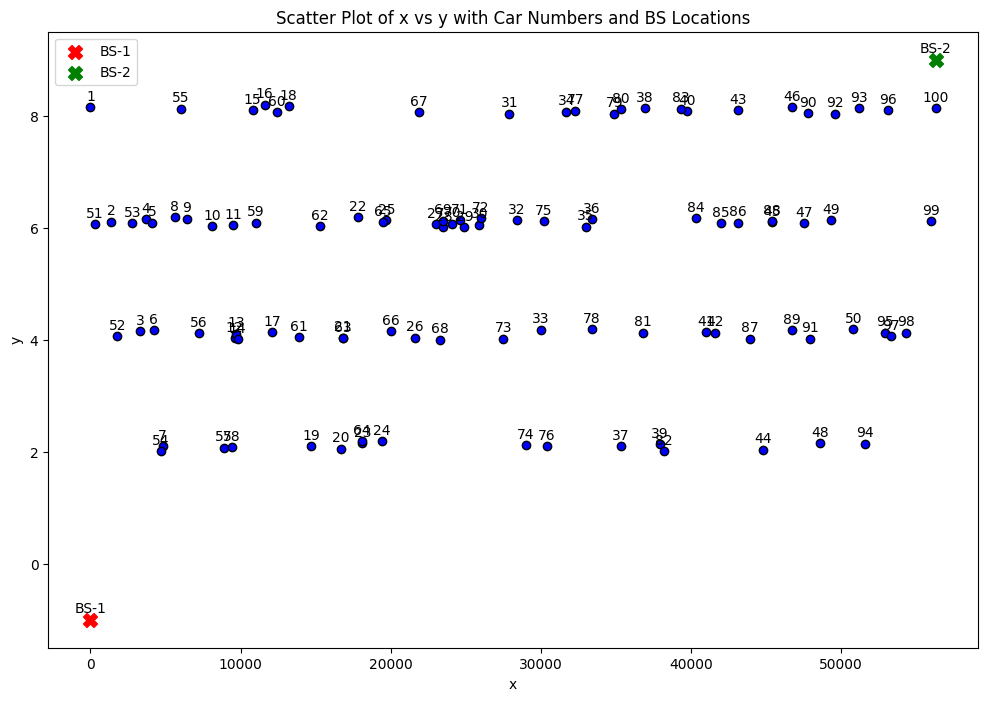

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
car_numbers = df['No.'].tolist()
x_values = df['x'].tolist()
y_values = df['y'].tolist()

# Coordinates for BS-1 and BS-2
bs1_coordinates = (-1, -1)
bs2_coordinates = (56325, 9)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot the cars
plt.scatter(x_values, y_values, marker='o', c='blue', edgecolors='black')

# Annotate each point with the car number
for car_number, x, y in zip(car_numbers, x_values, y_values):
    plt.annotate(str(car_number), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot BS-1 and BS-2
plt.scatter(*bs1_coordinates, marker='X', c='red', s=100, label='BS-1')
plt.scatter(*bs2_coordinates, marker='X', c='green', s=100, label='BS-2')

# Annotate BS-1 and BS-2
plt.annotate('BS-1', bs1_coordinates, textcoords="offset points", xytext=(0, 5), ha='center')
plt.annotate('BS-2', bs2_coordinates, textcoords="offset points", xytext=(0, 5), ha='center')

# Labeling and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y with Car Numbers and BS Locations')
plt.legend()

# Show the plot
plt.show()


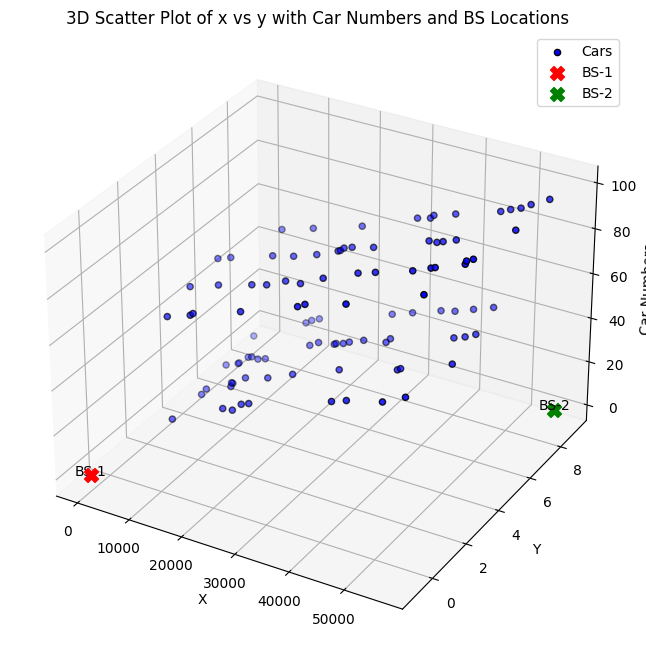

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' is your DataFrame
car_numbers = df['No.'].tolist()
x_values = df['x'].tolist()
y_values = df['y'].tolist()

# Coordinates for BS-1 and BS-2
bs1_coordinates = (-1, -1)
bs2_coordinates = (56325, 9)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the cars
ax.scatter(x_values, y_values, car_numbers, c='blue', marker='o', edgecolors='black', label='Cars')

# Plot BS-1 and BS-2
ax.scatter(*bs1_coordinates, 0, c='red', marker='X', s=100, label='BS-1')
ax.scatter(*bs2_coordinates, 0, c='green', marker='X', s=100, label='BS-2')

# Annotate BS-1 and BS-2
ax.text(bs1_coordinates[0], bs1_coordinates[1], 0, 'BS-1', ha='center')
ax.text(bs2_coordinates[0], bs2_coordinates[1], 0, 'BS-2', ha='center')

# Labeling and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Car Numbers')
ax.set_title('3D Scatter Plot of x vs y with Car Numbers and BS Locations')
ax.legend()

# Show the plot
plt.show()


In [ ]:
def initialize_population(population_size, graph, start_node, end_nodes):
    """
    Initialize a population of paths using the shortest path as a template.

    Parameters:
    - population_size: Number of individuals in the population
    - graph: Dictionary representing the network
    - start_node: Starting node for the paths
    - end_nodes: List of target nodes for the paths

    Returns:
    - List of paths representing the initial population
    """
    population = []
    for _ in range(population_size):
        path = nx.shortest_path(nx.Graph(graph), source=start_node, target=end_nodes, weight='weight')
        population.append(path)
    return population

def calculate_fitness(individual, graph):
    """
    Calculate the fitness of an individual path.

    Parameters:
    - individual: List representing the path
    - graph: Dictionary representing the network

    Returns:
    - Fitness score based on transmission rates along the path
    """
    transmission_rates = []

    for i in range(len(individual) - 1):
        current_node = individual[i]
        next_node = individual[i + 1]

        # Check if the edge exists in the graph
        if current_node in graph and next_node in graph[current_node]:
            transmission_rate = graph[current_node][next_node]

            # If transmission_rate is a dictionary, consider the minimum value
            if isinstance(transmission_rate, dict):
                transmission_rate = min(transmission_rate.values(), default=float('inf'))

            # Append the transmission rate to the list
            transmission_rates.append(transmission_rate)

    # Handle the case when all transmission rates are "infinite"
    if all(rate == float('inf') for rate in transmission_rates):
        return float('inf')

    # Return the minimum transmission rate
    min_transmission_rate = min(transmission_rates, default=float('inf'))

    return min_transmission_rate

def normalize_fitness(fitness_scores):
    """
    Normalize fitness scores to ensure a finite and non-zero total.

    Parameters:
    - fitness_scores: List of fitness scores

    Returns:
    - Normalized fitness scores
    """
    finite_fitness_scores = [score for score in fitness_scores if score != float('inf')]
    total = sum(finite_fitness_scores)

    if total != 0:
        normalized_fitness = [score / total if score != float('inf') else 0 for score in fitness_scores]
    else:
        # If the total is zero, return equal weights
        normalized_fitness = [1 / len(fitness_scores)] * len(fitness_scores)

    return normalized_fitness


def select_parents(population, normalized_fitness):
    """
    Select parents for crossover based on normalized fitness.

    Parameters:
    - population: List of individuals in the population
    - normalized_fitness: List of normalized fitness scores

    Returns:
    - Two selected parents
    """
    # Check if all fitness scores are float('-inf')
    if all(score == float('-inf') for score in normalized_fitness):
        # If all scores are '-inf', select two random parents
        return random.choice(population), random.choice(population)

    parent1_index = random.choices(range(len(population)), weights=normalized_fitness)[0]
    parent2_index = random.choices(range(len(population)), weights=normalized_fitness)[0]
    return population[parent1_index], population[parent2_index]

def crossover(parent1, parent2, graph):
    crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child = parent1[:crossover_point]

    # Add nodes from parent2 that are not already in the child
    for node in parent2:
        if node not in child:
            child.append(node)

    return child

def mutate(individual, mutation_rate, graph):
    """
    Mutate an individual by swapping two random positions in the path.

    Parameters:
    - individual: List representing the path
    - mutation_rate: Probability of mutation
    - graph: Dictionary representing the network

    Returns:
    - Mutated individual
    """
    if random.random() < mutation_rate:
        # Mutate by swapping two random positions in the path
        index1, index2 = random.sample(range(len(individual)), 2)
        individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual

def plot_fitness_progress(fitness_progress):
    """
    Plot the progress of the best fitness scores across generations.

    Parameters:
    - fitness_progress: List of best fitness scores in each generation.
    """
    plt.plot(range(1, len(fitness_progress) + 1), fitness_progress, marker='o')
    plt.title('Genetic Algorithm Fitness Progress')
    plt.xlabel('Generation')
    # plt.ylabel('Best Fitness Score')
    # plt.show()

def genetic_algorithm(graph, start_node, end_nodes, population_size, generations, mutation_rate):
    population = initialize_population(population_size, graph, start_node, end_nodes)
    fitness_progress = []

    for generation in range(generations):
        fitness_scores = [calculate_fitness(individual, graph) for individual in population]
        normalized_fitness = normalize_fitness(fitness_scores)
        parent1, parent2 = select_parents(population, normalized_fitness)

        child = crossover(parent1, parent2, graph)
        child_fitness = calculate_fitness(child, graph)

        min_fitness_index = fitness_scores.index(min(fitness_scores))
        if child_fitness < fitness_scores[min_fitness_index]:
            population[min_fitness_index] = child

        child = mutate(child, mutation_rate, graph)

        best_fitness = max(fitness_scores)
        fitness_progress.append(best_fitness)

    best_individual_index = fitness_scores.index(min(fitness_scores))
    best_path = population[best_individual_index]
    max_transmission_rate = min(fitness_scores)

    if max_transmission_rate == float('inf'):
        max_transmission_rate_str = "infinite Mbps"
    else:
        max_transmission_rate_str = f"{max_transmission_rate} Mbps"

    # print(f"Optimal path from {start_node} to {end_nodes}: {best_path}")

    # plot_fitness_progress(fitness_progress)

    return best_path

# Example usage:``
# Assuming G2 is your network graph, start_node and end_nodes are specified
start_node = 'Car_1'
end_nodes = 'Base_Station_2'
population_size = 10
generations = 50
mutation_rate = 0.1

best_path = genetic_algorithm(G2, start_node, end_nodes, population_size, generations, mutation_rate)

In [ ]:
def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10
for car_id in range(1, 101):
    start_node = f'Car_{car_id}'

    # Iterate over all base stations
    for base_station_id in range(1, 3):
        end_nodes = f'Base_Station_{base_station_id}'

        # Run the genetic algorithm for each combination of car and base station
        best_path = genetic_algorithm(G2, start_node, end_nodes, population_size, generations, mutation_rate)

        # Calculate the transmission rate (latency) of the selected best path
        transmission_rate_best_path = calculate_fitness(best_path, G2)

        # Print results
        print(f"Optimal path from {start_node} to {end_nodes}: {best_path}")
        print(f"Transmission rate (latency) of the selected best path: {calculate_transmission_rate(transmission_rate_best_path)} Mbps")


Optimal path from Car_1 to Base_Station_1: ['Car_1', 'Base_Station_1']
Transmission rate (latency) of the selected best path: 10 Mbps
Optimal path from Car_1 to Base_Station_2: ['Car_1', 'Car_8', 'Car_59', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']
Transmission rate (latency) of the selected best path: 4 Mbps
Optimal path from Car_2 to Base_Station_1: ['Car_2', 'Base_Station_1']
Transmission rate (latency) of the selected best path: 6 Mbps
Optimal path from Car_2 to Base_Station_2: ['Car_2', 'Car_5', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']
Transmission rate (latency) of the selected best path: 4 Mbps
Optimal path from Car_3 to Base_Station_1: ['Car_3', 'Base_Station_1']
Transmission rate (latency) of the selected best path: 2 Mbps
Optimal path from Car_3 to Base_Station_2: ['Car_3', 'Car_56', 'Car_13', 'Car_61', 'Car_21', 'Ca

In [ ]:
def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

for car_id in range(1, 101):
    start_node = f'Car_{car_id}'

    # Iterate over all base stations
    for base_station_id in range(1, 3):
        end_node = f'Base_Station_{base_station_id}'

        # Run the genetic algorithm for each combination of car and base station
        best_path = genetic_algorithm(G2, start_node, end_node, population_size, generations, mutation_rate)

        # Calculate the transmission rate (latency) of the selected best path
        transmission_rate_best_path = calculate_fitness(best_path, G2)

        # Calculate the total latency for the path (50 units per path)
        total_latency = len(best_path) * 50

        # Create a list to store each step in the routing path
        routing_path_steps = [
            (best_path[i], calculate_transmission_rate(G2[best_path[i]][best_path[i+1]]['weight'])) for i in range(len(best_path) - 1)
        ]

        # Add the end node to the routing path
        routing_path_steps.append((end_node, calculate_transmission_rate(G2[best_path[-2]][end_node]['weight'])))

        # Construct the "Routing path" entry
        routing_path_str = ', '.join(f'({step[0]}, {step[1]} Mbps)' for step in routing_path_steps)

        # Create the result dictionary
        result_dict = {
            "Source node": start_node,
            "Routing path": routing_path_str,
            "End-to-end transmission rate": f"{calculate_transmission_rate(transmission_rate_best_path)} Mbps",
            "Total Latency": total_latency
        }

        # Print the result dictionary
        print(result_dict)


{'Source node': 'Car_1', 'Routing path': '(Car_1, 10 Mbps), (Base_Station_1, 10 Mbps)', 'End-to-end transmission rate': '10 Mbps', 'Total Latency': 100}
{'Source node': 'Car_1', 'Routing path': '(Car_1, 1 Mbps), (Car_8, 1 Mbps), (Car_59, 1 Mbps), (Car_62, 1 Mbps), (Car_65, 1 Mbps), (Car_69, 4 Mbps), (Car_72, 1 Mbps), (Car_34, 2 Mbps), (Car_80, 1 Mbps), (Car_83, 2 Mbps), (Car_43, 2 Mbps), (Car_46, 1 Mbps), (Car_93, 1 Mbps), (Base_Station_2, 1 Mbps)', 'End-to-end transmission rate': '4 Mbps', 'Total Latency': 700}
{'Source node': 'Car_2', 'Routing path': '(Car_2, 6 Mbps), (Base_Station_1, 6 Mbps)', 'End-to-end transmission rate': '6 Mbps', 'Total Latency': 100}
{'Source node': 'Car_2', 'Routing path': '(Car_2, 4 Mbps), (Car_5, 1 Mbps), (Car_11, 1 Mbps), (Car_62, 1 Mbps), (Car_65, 1 Mbps), (Car_69, 4 Mbps), (Car_72, 1 Mbps), (Car_34, 2 Mbps), (Car_80, 1 Mbps), (Car_83, 2 Mbps), (Car_43, 2 Mbps), (Car_46, 1 Mbps), (Car_93, 1 Mbps), (Base_Station_2, 1 Mbps)', 'End-to-end transmission rate':

In [ ]:
for car_id in range(1, 101):
    start_node = f'Car_{car_id}'

    # Iterate over all base stations
    for base_station_id in range(1, 3):
        end_nodes = f'Base_Station_{base_station_id}'

        # Run the genetic algorithm for each combination of car and base station
        best_path = genetic_algorithm(G2, start_node, end_nodes, population_size, generations, mutation_rate)

        # Calculate the transmission rate (latency) of the selected best path
        transmission_rate_best_path = calculate_fitness(best_path, G2)

        # Calculate the total distance of the selected best path
        total_distance_best_path = sum(G2[best_path[i]][best_path[i+1]]['weight'] for i in range(len(best_path)-1))

        # Print results
        print(f"Optimal path from {start_node} to {end_nodes}: {best_path}")
        print(f"Transmission rate (latency) of the selected best path: {calculate_transmission_rate(transmission_rate_best_path)} Mbps")


Optimal path from Car_1 to Base_Station_1: ['Car_1', 'Base_Station_1']
Transmission rate (latency) of the selected best path: 10 Mbps
Optimal path from Car_1 to Base_Station_2: ['Car_1', 'Car_8', 'Car_59', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']
Transmission rate (latency) of the selected best path: 4 Mbps
Optimal path from Car_2 to Base_Station_1: ['Car_2', 'Base_Station_1']
Transmission rate (latency) of the selected best path: 6 Mbps
Optimal path from Car_2 to Base_Station_2: ['Car_2', 'Car_5', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']
Transmission rate (latency) of the selected best path: 4 Mbps
Optimal path from Car_3 to Base_Station_1: ['Car_3', 'Base_Station_1']
Transmission rate (latency) of the selected best path: 2 Mbps
Optimal path from Car_3 to Base_Station_2: ['Car_3', 'Car_56', 'Car_13', 'Car_61', 'Car_21', 'Ca

In [ ]:
print(G2)
for car_id in range(1, 101):
    start_node = f'Car_{car_id}'
    end_nodes = 'Base_Station_1'  # Alternating between 'Base_Station_1' and 'Base_Station_2'

    best_path = genetic_algorithm(G2, start_node, end_nodes, population_size, generations, mutation_rate)

    # Calculate the transmission rate of the selected best path
    transmission_rate_best_path = calculate_fitness(best_path, G2)

    print(f"Transmission rate of the selected best path for {start_node}: {calculate_transmission_rate(transmission_rate_best_path)} Mbps")

Graph with 102 nodes and 988 edges
Transmission rate of the selected best path for Car_1: 10 Mbps
Transmission rate of the selected best path for Car_2: 6 Mbps
Transmission rate of the selected best path for Car_3: 2 Mbps
Transmission rate of the selected best path for Car_4: 2 Mbps
Transmission rate of the selected best path for Car_5: 1 Mbps
Transmission rate of the selected best path for Car_6: 1 Mbps
Transmission rate of the selected best path for Car_7: 1 Mbps
Transmission rate of the selected best path for Car_8: 1 Mbps
Transmission rate of the selected best path for Car_9: 4 Mbps
Transmission rate of the selected best path for Car_10: 2 Mbps
Transmission rate of the selected best path for Car_11: 1 Mbps
Transmission rate of the selected best path for Car_12: 1 Mbps
Transmission rate of the selected best path for Car_13: 1 Mbps
Transmission rate of the selected best path for Car_14: 1 Mbps
Transmission rate of the selected best path for Car_15: 4 Mbps
Transmission rate of the sel

In [ ]:
print(G2)

Graph with 102 nodes and 988 edges


In [ ]:
import networkx as nx
import random

def initialize_pheromones(graph, start_node):
    pheromones = {}
    for node in graph.nodes:
        pheromones[node] = {}
        for neighbor in graph.neighbors(node):
            pheromones[node][neighbor] = 1.0  # Initial pheromone level
    return pheromones

def calculate_probabilities(pheromone, graph, current_node, neighbors, alpha, beta):
    probabilities = []
    total = 0

    for neighbor in neighbors:
        shortest_path_length = nx.shortest_path_length(graph, source=current_node, target=neighbor, weight='weight')
        probability = (pheromone[current_node][neighbor] ** alpha) * (1 / shortest_path_length ** beta)
        probabilities.append(probability)
        total += probability

    if total != 0:
        probabilities = [p / total for p in probabilities]

    return probabilities

def select_next_node(pheromone, graph, current_node, alpha, beta):
    neighbors = list(graph.neighbors(current_node))
    probabilities = calculate_probabilities(pheromone, graph, current_node, neighbors, alpha, beta)
    next_node = random.choices(neighbors, weights=probabilities)[0]
    return next_node

def ant_colony_optimization(graph, start_node, end_nodes, num_ants, iterations, alpha=1, beta=2, evaporation_rate=0.5):
    pheromones = initialize_pheromones(graph, start_node)
    best_path = []
    best_path_length = float('inf')

    for _ in range(iterations):
        for ant in range(num_ants):
            current_node = start_node
            path = [current_node]

            while current_node not in end_nodes:
                neighbors = list(graph.neighbors(current_node))
                next_node = select_next_node(pheromones, graph, current_node, alpha, beta)
                path.append(next_node)
                current_node = next_node

            path_length = sum(graph[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))

            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # Update pheromones
        for i in range(len(best_path) - 1):
            current_node = best_path[i]
            next_node = best_path[i + 1]
            pheromones[current_node][next_node] = (1 - evaporation_rate) * pheromones[current_node][next_node] + evaporation_rate / best_path_length

    return best_path


start_node = 'Car_100'
end_node = 'Base_Station_2'
shortest_path = nx.shortest_path(G2, source=start_node, target=end_node, weight='weight')
print("Shortest path:", shortest_path)

Shortest path: ['Car_100', 'Base_Station_2']


#Dijastra algorithm  

In [ ]:
 print('graph nodes', G2.nodes)
 print('graph edges', G2.edges)


graph nodes ['Car_1', 'Car_2', 'Car_3', 'Car_4', 'Car_5', 'Car_6', 'Car_7', 'Car_8', 'Car_51', 'Car_52', 'Car_53', 'Car_54', 'Base_Station_1', 'Car_9', 'Car_55', 'Car_56', 'Car_10', 'Car_57', 'Car_11', 'Car_12', 'Car_58', 'Car_13', 'Car_14', 'Car_15', 'Car_59', 'Car_16', 'Car_17', 'Car_18', 'Car_60', 'Car_61', 'Car_19', 'Car_62', 'Car_20', 'Car_63', 'Car_21', 'Car_22', 'Car_64', 'Car_23', 'Car_24', 'Car_25', 'Car_65', 'Car_66', 'Car_26', 'Car_67', 'Car_27', 'Car_28', 'Car_68', 'Car_69', 'Car_70', 'Car_29', 'Car_71', 'Car_30', 'Car_72', 'Car_73', 'Car_31', 'Car_32', 'Car_74', 'Car_33', 'Car_75', 'Car_76', 'Car_34', 'Car_35', 'Car_36', 'Car_77', 'Car_78', 'Car_37', 'Car_79', 'Car_80', 'Car_38', 'Car_81', 'Car_39', 'Car_82', 'Car_83', 'Car_40', 'Car_41', 'Car_84', 'Car_42', 'Car_85', 'Car_43', 'Car_86', 'Car_44', 'Car_45', 'Car_87', 'Car_88', 'Car_46', 'Car_89', 'Car_47', 'Car_48', 'Car_90', 'Car_91', 'Car_49', 'Car_92', 'Car_50', 'Car_93', 'Car_94', 'Car_95', 'Car_96', 'Car_97', 'Car_98'

In [ ]:
graph = {
    "Car-1": {"Car-2": 4, "Car-4": 4, "Car-3": 4, "Car-5": 3},
    "Car-2": {"Car-4": 5, "Car-1": 4, "Base Station-1": 6},
    "Car-3": {"Car-1": 4, "Car-6": 3},
    "Car-4": {"Car-1": 4, "Car-2": 5, "Car-7": 1, "Car-5": 4},
    "Car-5": {"Car-7": 2, "Car-8": 7, "Car-9": 4, "Car-6": 5, "Car-1": 3, "Car-4": 4},
    "Car-6": {"Car-5": 5, "Car-3": 3, "Car-9": 5},
    "Car-7": {"Base Station-2": 6, "Car-8": 3, "Car-5": 2, "Car-4": 1},
    "Car-8": {"Car-7": 3, "Car-5": 7, "Car-9": 4},
    "Car-9": {"Car-8": 4, "Car-6": 5, "Car-5": 4},
    "Base Station-1": {"Car-2": 6},
    "Base Station-2": {"Car-7": 6}
}

In [ ]:
import networkx as nx
import random

def initialize_pheromones(graph, start_node):
    pheromones = {}
    for node in graph.nodes:
        pheromones[node] = {}
        for neighbor in graph.neighbors(node):
            pheromones[node][neighbor] = 1.0  # Initial pheromone level
    return pheromones

def calculate_probabilities(pheromone, graph, current_node, neighbors, alpha, beta):
    probabilities = []
    total = 0

    for neighbor in neighbors:
        shortest_path_length = nx.shortest_path_length(graph, source=current_node, target=neighbor, weight='weight')
        probability = (pheromone[current_node][neighbor] ** alpha) * (1 / shortest_path_length ** beta)
        probabilities.append(probability)
        total += probability

    if total != 0:
        probabilities = [p / total for p in probabilities]

    return probabilities

def select_next_node(pheromone, graph, current_node, alpha, beta):
    neighbors = list(graph.neighbors(current_node))
    probabilities = calculate_probabilities(pheromone, graph, current_node, neighbors, alpha, beta)
    next_node = random.choices(neighbors, weights=probabilities)[0]
    return next_node

def ant_colony_optimization(graph, start_node, end_nodes, num_ants, iterations, alpha=1, beta=2, evaporation_rate=0.5):
    pheromones = initialize_pheromones(graph, start_node)
    best_path = []
    best_path_length = float('inf')

    for _ in range(iterations):
        for ant in range(num_ants):
            current_node = start_node
            path = [current_node]

            while current_node not in end_nodes:
                neighbors = list(graph.neighbors(current_node))
                next_node = select_next_node(pheromones, graph, current_node, alpha, beta)
                path.append(next_node)
                current_node = next_node

            path_length = sum(graph[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))

            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # Update pheromones
        for i in range(len(best_path) - 1):
            current_node = best_path[i]
            next_node = best_path[i + 1]
            pheromones[current_node][next_node] = (1 - evaporation_rate) * pheromones[current_node][next_node] + evaporation_rate / best_path_length

    return best_path

# Assuming G is your graph
start_node = 'Car_1'
end_node = 'Base_Station_2'
end_nodes = [end_node]  # Convert to a list for compatibility with the function
num_ants = 10
iterations = 50

# Using ACO
aco_path = ant_colony_optimization(G2, start_node, end_nodes, num_ants, iterations)
aco_path_length = sum(G[aco_path[i]][aco_path[i + 1]]['weight'] for i in range(len(aco_path) - 1))
print("ACO Path:", aco_path)
print("ACO Path Length:", aco_path_length)

# Using nx.shortest_path
shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')
shortest_path_length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='weight')
print("\nShortest Path:", shortest_path)
print("Shortest Path Length:", shortest_path_length)


KeyboardInterrupt: ignored

In [ ]:
print("Graph Structure:")
for node, neighbors in G2.adjacency():
    print(f"{node}: {list(neighbors)}")


Graph Structure:
Car_1: ['Car_2', 'Car_3', 'Car_4', 'Car_5', 'Car_6', 'Car_7', 'Car_8', 'Car_51', 'Car_52', 'Car_53', 'Car_54', 'Base_Station_1']
Car_2: ['Car_1', 'Car_3', 'Car_4', 'Car_5', 'Car_6', 'Car_7', 'Car_8', 'Car_9', 'Car_51', 'Car_52', 'Car_53', 'Car_54', 'Car_55', 'Car_56', 'Base_Station_1']
Car_3: ['Car_1', 'Car_2', 'Car_4', 'Car_5', 'Car_6', 'Car_7', 'Car_8', 'Car_9', 'Car_10', 'Car_51', 'Car_52', 'Car_53', 'Car_54', 'Car_55', 'Car_56', 'Car_57', 'Base_Station_1']
Car_4: ['Car_1', 'Car_2', 'Car_3', 'Car_5', 'Car_6', 'Car_7', 'Car_8', 'Car_9', 'Car_10', 'Car_11', 'Car_12', 'Car_51', 'Car_52', 'Car_53', 'Car_54', 'Car_55', 'Car_56', 'Car_57', 'Car_58', 'Base_Station_1']
Car_5: ['Car_1', 'Car_2', 'Car_3', 'Car_4', 'Car_6', 'Car_7', 'Car_8', 'Car_9', 'Car_10', 'Car_11', 'Car_12', 'Car_13', 'Car_14', 'Car_51', 'Car_52', 'Car_53', 'Car_54', 'Car_55', 'Car_56', 'Car_57', 'Car_58', 'Base_Station_1']
Car_6: ['Car_1', 'Car_2', 'Car_3', 'Car_4', 'Car_5', 'Car_7', 'Car_8', 'Car_9', 'C

In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Example: Find the shortest path for Car-1 to reach Base Station-1
# shortest_distance, optimal_path = astar(car_distances_dict, f"Car_10", 'Base_Station_2')
for i in range(1, 101):
  print(i)
  distances=[]
  shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{i}", 'Base_Station_2')
  distances.append([*optimal_path])
print("Shortest Dist:ance (A*):", shortest_distance)
print("Optimal Path:", distances)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Shortest Dist:ance (A*): 1.0675436083833232
Optimal Path: [['Car_100', 'Base_Station_2']]


In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Example: Find the shortest path for Car-1 to reach Base Station-1
for i in range(1, 101):
    distances = []
    shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{i}", 'Base_Station_2')
    distances.append([*optimal_path])
    print(f"Car_{i} - Shortest Distance (A*):", shortest_distance)
    print(f"Car_{i} - Optimal Path:", distances)


Car_1 - Shortest Distance (A*): 56325.00073914884
Car_1 - Optimal Path: [['Car_1', 'Car_8', 'Car_59', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']]
Car_2 - Shortest Distance (A*): 54924.87551540457
Car_2 - Optimal Path: [['Car_2', 'Car_5', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']]
Car_3 - Shortest Distance (A*): 53024.19552578744
Car_3 - Optimal Path: [['Car_3', 'Car_56', 'Car_13', 'Car_61', 'Car_21', 'Car_66', 'Car_30', 'Car_75', 'Car_36', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']]
Car_4 - Shortest Distance (A*): 52623.36638504944
Car_4 - Optimal Path: [['Car_4', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']]
Car_5 - Shortest Distance (A*): 52222.417143339706
Car_5 - Optimal Path: [['Car_5', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 

In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Example: Find the shortest path for Car-1 to reach Base Station-1
for i in range(1, 101):
    distances = []
    shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{i}", 'Base_Station_2')
    distances.append([*optimal_path, shortest_distance])
    print(f"Car_{i} - Optimal Path and Distance:", distances)


Car_1 - Optimal Path and Distance: [['Car_1', 'Car_8', 'Car_59', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2', 56325.00073914884]]
Car_2 - Optimal Path and Distance: [['Car_2', 'Car_5', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2', 54924.87551540457]]
Car_3 - Optimal Path and Distance: [['Car_3', 'Car_56', 'Car_13', 'Car_61', 'Car_21', 'Car_66', 'Car_30', 'Car_75', 'Car_36', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2', 53024.19552578744]]
Car_4 - Optimal Path and Distance: [['Car_4', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2', 52623.36638504944]]
Car_5 - Optimal Path and Distance: [['Car_5', 'Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2', 52222.417143339706]]
C

In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Function to calculate end-to-end transmission rate
def calculate_transmission_rate(optimal_path, car_distances_dict):
    transmission_rate = float('inf')  # Initialize with infinity

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        transmission_rate = min(transmission_rate, car_distances_dict[source][destination])

    return transmission_rate

# Example: Find the shortest path for Car-1 to reach Base Station-1
for i in range(1, 101):
    print(i)
    distances = []
    shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{i}", 'Base_Station_1')
    transmission_rate = calculate_transmission_rate(optimal_path, car_distances_dict)
    distances.append({
        "Source node": f"Car_{i}",
        "Routing path": ", ".join(optimal_path),
        "End-to-end transmission rate": f"{transmission_rate} Mbps"
    })

    print("Shortest Distance (A*):", shortest_distance)
    print("Optimal Path:", distances)


1
Shortest Distance (A*): 9.212094116520971
Optimal Path: [{'Source node': 'Car_1', 'Routing path': 'Car_1, Base_Station_1', 'End-to-end transmission rate': '9.212094116520971 Mbps'}]
2
Shortest Distance (A*): 1401.1429049497247
Optimal Path: [{'Source node': 'Car_2', 'Routing path': 'Car_2, Base_Station_1', 'End-to-end transmission rate': '1401.1429049497247 Mbps'}]
3
Shortest Distance (A*): 3301.8092017631193
Optimal Path: [{'Source node': 'Car_3', 'Routing path': 'Car_3, Base_Station_1', 'End-to-end transmission rate': '3301.8092017631193 Mbps'}]
4
Shortest Distance (A*): 3702.6409075554843
Optimal Path: [{'Source node': 'Car_4', 'Routing path': 'Car_4, Base_Station_1', 'End-to-end transmission rate': '3702.6409075554843 Mbps'}]
5
Shortest Distance (A*): 4103.589372099988
Optimal Path: [{'Source node': 'Car_5', 'Routing path': 'Car_5, Base_Station_1', 'End-to-end transmission rate': '4103.589372099988 Mbps'}]
6
Shortest Distance (A*): 4203.8041082344525
Optimal Path: [{'Source node'

In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Function to calculate end-to-end transmission rate
def calculate_transmission_rate(optimal_path, car_distances_dict):
    transmission_rate = float('inf')  # Initialize with infinity

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        transmission_rate = min(transmission_rate, car_distances_dict[source][destination])

    return transmission_rate

# Example: Find the shortest path for Car-92 to reach Base Station-2
car_number = 92
distances = []
shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{car_number}", 'Base_Station_2')
transmission_rate = calculate_transmission_rate(optimal_path, car_distances_dict)
distances.append({
    "Source node": f"Car_{car_number}",
    "Routing path": f"{optimal_path}",
    "End-to-end transmission rate": f"{transmission_rate} Mbps"
})

print("Shortest Distance (A*):", shortest_distance)
print("Optimal Path:", distances)


Shortest Distance (A*): 6704.761226418328
Optimal Path: [{'Source node': 'Car_92', 'Routing path': "['Car_92', 'Car_93', 'Base_Station_2']", 'End-to-end transmission rate': '1600.7751728772196 Mbps'}]


In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Function to calculate end-to-end transmission rate
def calculate_transmission_rate(optimal_path, car_distances_dict):
    transmission_rate = float('inf')  # Initialize with infinity
    hop_distances = []

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        hop_distance = car_distances_dict[source][destination]
        hop_distances.append({f"{source} to {destination}": hop_distance})

        transmission_rate = min(transmission_rate, hop_distance)

    return transmission_rate, hop_distances

# Example: Find the shortest path for Car-92 to reach Base Station-2
car_number = 1
distances = []
shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{car_number}", 'Base_Station_2')
transmission_rate, hop_distances = calculate_transmission_rate(optimal_path, car_distances_dict)
distances.append({
    "Source node": f"Car_{car_number}",
    "Routing path": f"{optimal_path}",
    "End-to-end transmission rate": f"{transmission_rate} Mbps",
    "Hop distances": hop_distances
})

print("Shortest Distance (A*):", shortest_distance)
print("Optimal Path:", distances)


Shortest Distance (A*): 56325.00073914884
Optimal Path: [{'Source node': 'Car_1', 'Routing path': "['Car_1', 'Car_8', 'Car_59', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']", 'End-to-end transmission rate': '2501.3874504242726 Mbps', 'Hop distances': [{'Car_1 to Car_8': 5603.688349586997}, {'Car_8 to Car_59': 5400.3586668745875}, {'Car_59 to Car_62': 4302.0895805573955}, {'Car_62 to Car_65': 4201.216800674803}, {'Car_65 to Car_69': 4001.4098400758508}, {'Car_69 to Car_72': 2501.3874504242726}, {'Car_72 to Car_34': 5705.480716762899}, {'Car_34 to Car_80': 3598.140930239107}, {'Car_80 to Car_83': 4002.4954500343197}, {'Car_83 to Car_43': 3803.1152200721444}, {'Car_43 to Car_46': 3602.381300276547}, {'Car_46 to Car_93': 4499.250380028806}, {'Car_93 to Base_Station_2': 5103.986053541108}]}]


In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Function to calculate end-to-end transmission rate
def calculate_transmission_rate(optimal_path, car_distances_dict):
    transmission_rate = float('inf')  # Initialize with infinity
    hop_distances = []

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        hop_distance = car_distances_dict[source][destination]
        hop_distances.append({f"{source} to {destination}": hop_distance})

        transmission_rate = min(transmission_rate, hop_distance)

    return transmission_rate, hop_distances

# Generate data for all cars to both base stations
all_distances_data = []

for car_number in range(1, 101):
    distances = []

    for base_station in ['Base_Station_1', 'Base_Station_2']:
        shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{car_number}", base_station)
        transmission_rate, hop_distances = calculate_transmission_rate(optimal_path, car_distances_dict)

        distances.append({
            "Source node": f"Car_{car_number}",
            "Routing path": f"{optimal_path}",
            "End-to-end transmission rate": f"{transmission_rate} Mbps",
            "Hop distances": hop_distances
        })

    all_distances_data.append(distances)

# Print or use the generated data as needed
for car_data in all_distances_data:
    for distances in car_data:
        print(distances)


{'Source node': 'Car_1', 'Routing path': "['Car_1', 'Base_Station_1']", 'End-to-end transmission rate': '9.212094116520971 Mbps', 'Hop distances': [{'Car_1 to Base_Station_1': 9.212094116520971}]}
{'Source node': 'Car_1', 'Routing path': "['Car_1', 'Car_8', 'Car_59', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93', 'Base_Station_2']", 'End-to-end transmission rate': '2501.3874504242726 Mbps', 'Hop distances': [{'Car_1 to Car_8': 5603.688349586997}, {'Car_8 to Car_59': 5400.3586668745875}, {'Car_59 to Car_62': 4302.0895805573955}, {'Car_62 to Car_65': 4201.216800674803}, {'Car_65 to Car_69': 4001.4098400758508}, {'Car_69 to Car_72': 2501.3874504242726}, {'Car_72 to Car_34': 5705.480716762899}, {'Car_34 to Car_80': 3598.140930239107}, {'Car_80 to Car_83': 4002.4954500343197}, {'Car_83 to Car_43': 3803.1152200721444}, {'Car_43 to Car_46': 3602.381300276547}, {'Car_46 to Car_93': 4499.250380028806}, {'Car_93 to Base_Station_2': 5103.986053

{'Source node': 'Car_5', 'Routing path': '[], (Base_Station_1, 4103.589372099988 Mbps)', 'End-to-end transmission rate': '4103.589372099988 Mbps'}
{'Source node': 'Car_5', 'Routing path': "['Car_11', 'Car_62', 'Car_65', 'Car_69', 'Car_72', 'Car_34', 'Car_80', 'Car_83', 'Car_43', 'Car_46', 'Car_93'], (Car_11, 5401.595504158691 Mbps), (Car_62, 5801.957497051166 Mbps), (Car_65, 4201.216800674803 Mbps), (Car_69, 4001.4098400758508 Mbps), (Car_72, 2501.3874504242726 Mbps), (Car_34, 5705.480716762899 Mbps), (Car_80, 3598.140930239107 Mbps), (Car_83, 4002.4954500343197 Mbps), (Car_43, 3803.1152200721444 Mbps), (Car_46, 3602.381300276547 Mbps), (Car_93, 4499.250380028806 Mbps), (Base_Station_2, 5103.986053541108 Mbps)", 'End-to-end transmission rate': '2501.3874504242726 Mbps'}


In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Function to calculate end-to-end transmission rate
def calculate_transmission_rate_optimized(distance):
    return calculate_transmission_rate(distance), distance

# Generate data for a specific car (e.g., Car-5) to both base stations
car_number = 1
distances = []

for base_station in ['Base_Station_1', 'Base_Station_2']:
    shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{car_number}", base_station)

    transmission_rates = []
    hop_distances = []

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        hop_distance = car_distances_dict[source][destination]
        hop_distances.append(f"({destination}, {calculate_transmission_rate(hop_distance)} Mbps)")

        transmission_rate, _ = calculate_transmission_rate_optimized(hop_distance)
        transmission_rates.append(transmission_rate)

    # The end-to-end transmission rate is the minimum transmission rate among all hops
    transmission_rate = min(transmission_rates)

    distances.append({
        "Source node": f"Car-{car_number}",
        "Destination node": base_station,
        "Routing path": ', '.join(hop_distances),
        "End-to-end transmission rate": f"{transmission_rate} Mbps"
    })

# Print or use the generated data as needed
for distances_data in distances:
    print(distances_data)


{'Source node': 'Car-1', 'Destination node': 'Base_Station_1', 'Routing path': '(Base_Station_1, 10 Mbps)', 'End-to-end transmission rate': '10 Mbps'}
{'Source node': 'Car-1', 'Destination node': 'Base_Station_2', 'Routing path': '(Car_8, 1 Mbps), (Car_59, 1 Mbps), (Car_62, 1 Mbps), (Car_65, 1 Mbps), (Car_69, 1 Mbps), (Car_72, 4 Mbps), (Car_34, 1 Mbps), (Car_80, 2 Mbps), (Car_83, 1 Mbps), (Car_43, 2 Mbps), (Car_46, 2 Mbps), (Car_93, 1 Mbps), (Base_Station_2, 1 Mbps)', 'End-to-end transmission rate': '1 Mbps'}


In [ ]:
 import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            heapq.heappush(priority_queue, (current_cost + cost + heuristic(neighbor, goal), neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Function to calculate end-to-end transmission rate
def calculate_transmission_rate_optimized(distance):
    return calculate_transmission_rate(distance)

# Generate data for a specific car (e.g., Car-1) to both base stations
car_number = 1
distances = []

for base_station in ['Base_Station_1', 'Base_Station_2']:
    shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{car_number}", base_station)

    transmission_rates = []
    hop_distances = []

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        hop_distance = car_distances_dict[source][destination]
        hop_distances.append(f"({destination}, {calculate_transmission_rate(hop_distance)} Mbps)")

        transmission_rate = calculate_transmission_rate_optimized(hop_distance)
        transmission_rates.append(transmission_rate)

    # The end-to-end transmission rate is the minimum transmission rate among all hops
    transmission_rate = min(transmission_rates)

    distances.append({
        "Source node": f"Car-{car_number}",
        "Destination node": base_station,
        "Routing path": ', '.join(hop_distances),
        "End-to-end transmission rate": f"{transmission_rate} Mbps"
    })

# Print or use the generated data as needed
for distances_data in distances:
    print(distances_data)


{'Source node': 'Car-1', 'Destination node': 'Base_Station_1', 'Routing path': '(Base_Station_1, 10 Mbps)', 'End-to-end transmission rate': '10 Mbps'}
{'Source node': 'Car-1', 'Destination node': 'Base_Station_2', 'Routing path': '(Car_8, 1 Mbps), (Car_59, 1 Mbps), (Car_62, 1 Mbps), (Car_65, 1 Mbps), (Car_69, 1 Mbps), (Car_72, 4 Mbps), (Car_34, 1 Mbps), (Car_80, 2 Mbps), (Car_83, 1 Mbps), (Car_43, 2 Mbps), (Car_46, 2 Mbps), (Car_93, 1 Mbps), (Base_Station_2, 1 Mbps)', 'End-to-end transmission rate': '1 Mbps'}


In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

def combined_cost(distance, latency):
    return distance + 50 * latency

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            new_cost = current_cost + cost
            new_latency = len(path_so_far)  # Assuming latency cost of 50 for each hop

            total_combined_cost = combined_cost(new_cost, new_latency)

            heapq.heappush(priority_queue, (total_combined_cost, neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Example usage for a specific car (e.g., Car_5) to both base stations
car_number = 5
distances = []

# Assuming the keys in car_distances_dict are in the format 'Car_X' or 'Base_Station_X'
for base_station in ['Base_Station_1', 'Base_Station_2']:
    shortest_cost, optimal_path = astar(car_distances_dict, f"Car_{car_number}", base_station)
    total_distance = shortest_cost  # Assuming the total distance is the total cost
    total_latency = len(optimal_path) - 1  # Assuming latency cost of 50 for each hop

    distances.append({
        "Source node": f"Car_{car_number}",
        "Destination node": base_station,
        "Routing path": optimal_path,
        "Total distance": total_distance,
        "Total latency": total_latency,
        "Combined cost": combined_cost(total_distance, total_latency)
    })

# Print or use the generated data as needed
for distances_data in distances:
    print(distances_data)


{'Source node': 'Car_5', 'Destination node': 'Base_Station_1', 'Routing path': ['Car_5', 'Base_Station_1'], 'Total distance': 4103.589372099988, 'Total latency': 1, 'Combined cost': 4153.589372099988}
{'Source node': 'Car_5', 'Destination node': 'Base_Station_2', 'Routing path': ['Car_5', 'Car_11', 'Car_62', 'Car_65', 'Car_71', 'Car_75', 'Car_79', 'Car_84', 'Car_88', 'Car_93', 'Base_Station_2'], 'Total distance': 54472.41789168039, 'Total latency': 10, 'Combined cost': 54972.41789168039}


KeyError: ignored

In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

def astar(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            new_cost = current_cost + cost
            new_latency = len(path_so_far) * 50  # Assuming latency cost of 50 for each hop

            total_combined_cost = new_cost + new_latency

            heapq.heappush(priority_queue, (total_combined_cost, neighbor, path_so_far + [current_node]))

    return float('inf'), []

# Example usage for a specific car (e.g., Car-1) to both base stations
car_number = 1
distances = []

for base_station in ['Base_Station_1', 'Base_Station_2']:
    shortest_distance, optimal_path = astar(car_distances_dict, f"Car_{car_number}", base_station)

    transmission_rates = []
    hop_info = []

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        hop_distance = car_distances_dict[source][destination]
        hop_info.append(f"({destination}, {calculate_transmission_rate(hop_distance)} Mbps)")

        transmission_rate = calculate_transmission_rate(hop_distance)
        transmission_rates.append(transmission_rate)

    # The end-to-end transmission rate is the minimum transmission rate among all hops
    end_to_end_transmission_rate = min(transmission_rates)

    distances.append({
        "Source node": f"Car-{car_number}",
        "Destination node": base_station,
        "Routing path": ', '.join(hop_info),
        "End-to-end transmission rate": f"{end_to_end_transmission_rate} Mbps"
    })

# Print or use the generated data as needed
for distances_data in distances:
    print(distances_data)


{'Source node': 'Car-1', 'Destination node': 'Base_Station_1', 'Routing path': '(Base_Station_1, 10 Mbps)', 'End-to-end transmission rate': '10 Mbps'}
{'Source node': 'Car-1', 'Destination node': 'Base_Station_2', 'Routing path': '(Car_8, 1 Mbps), (Car_59, 1 Mbps), (Car_21, 1 Mbps), (Car_26, 1 Mbps), (Car_73, 1 Mbps), (Car_78, 1 Mbps), (Car_81, 2 Mbps), (Car_85, 1 Mbps), (Car_90, 1 Mbps), (Car_93, 2 Mbps), (Base_Station_2, 1 Mbps)', 'End-to-end transmission rate': '1 Mbps'}


In [ ]:
 import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

def astar(graph, start, goal):
    priority_queue = [(0, 0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_latency, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, current_latency, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            new_cost = current_cost + cost
            new_latency = current_latency + 50  # Assuming latency cost of 50 for each hop

            total_combined_cost = new_cost + new_latency

            heapq.heappush(priority_queue, (total_combined_cost, new_latency, neighbor, path_so_far + [current_node]))

    return float('inf'), float('inf'), []

# Example usage for a specific car (e.g., Car-1) to both base stations
car_number = 1
distances = []

for base_station in ['Base_Station_1', 'Base_Station_2']:
    shortest_distance, shortest_latency, optimal_path = astar(car_distances_dict, f"Car_{car_number}", base_station)

    transmission_rates = []
    hop_info = []

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the shortest distance for each hop in the optimal path
        hop_distance = car_distances_dict[source][destination]
        hop_info.append(f"({destination}, {calculate_transmission_rate(hop_distance)} Mbps)")

        transmission_rate = calculate_transmission_rate(hop_distance)
        transmission_rates.append(transmission_rate)

    # The end-to-end transmission rate is the minimum transmission rate among all hops
    end_to_end_transmission_rate = min(transmission_rates)

    distances.append({
        "Source node": f"Car-{car_number}",
        "Destination node": base_station,
        "Routing path": ', '.join(hop_info),
        "End-to-end transmission rate": f"{end_to_end_transmission_rate} Mbps",
        "Total distance": shortest_distance,
        "Total latency": shortest_latency
    })

# Print or use the generated data as needed
for distances_data in distances:
    print(distances_data)


{'Source node': 'Car-1', 'Destination node': 'Base_Station_1', 'Routing path': '(Base_Station_1, 10 Mbps)', 'End-to-end transmission rate': '10 Mbps', 'Total distance': 59.21209411652097, 'Total latency': 50}
{'Source node': 'Car-1', 'Destination node': 'Base_Station_2', 'Routing path': '(Car_8, 1 Mbps), (Car_59, 1 Mbps), (Car_21, 1 Mbps), (Car_26, 1 Mbps), (Car_73, 1 Mbps), (Car_78, 1 Mbps), (Car_81, 2 Mbps), (Car_85, 1 Mbps), (Car_90, 1 Mbps), (Car_93, 2 Mbps), (Base_Station_2, 1 Mbps)', 'End-to-end transmission rate': '1 Mbps', 'Total distance': 59625.001487217174, 'Total latency': 550}


In [ ]:
import heapq

def heuristic(node, goal):
    # You can use distance, Euclidean distance, or any other appropriate heuristic
    return 0  # For simplicity, using 0 as a heuristic for now

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

def astar(graph, start, goal):
    priority_queue = [(0, 0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_latency, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, current_latency, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            new_cost = current_cost + calculate_transmission_rate(cost)  # Convert distance to transmission rate
            new_latency = current_latency + 50  # Assuming latency cost of 50 for each hop

            total_combined_cost = new_cost + new_latency

            heapq.heappush(priority_queue, (total_combined_cost, new_latency, neighbor, path_so_far + [current_node]))

    return float('inf'), float('inf'), []

# Convert distances in the car dictionary
converted_car_distances_dict = {}
for car, distances in car_distances_dict.items():
    converted_distances = {key: calculate_transmission_rate(value) for key, value in distances.items()}
    converted_car_distances_dict[car] = converted_distances
print(converted_car_distances_dict)
# Find optimal path for a specific car (e.g., Car-1) to both base stations
car_number = 2
distances = []

for base_station in ['Base_Station_1', 'Base_Station_2']:
    shortest_cost, shortest_latency, optimal_path = astar(converted_car_distances_dict, f"Car_{car_number}", base_station)

    transmission_rates = []
    hop_info = []

    for i in range(len(optimal_path) - 1):
        source = optimal_path[i]
        destination = optimal_path[i + 1]

        # Taking the transmission rate for each hop in the optimal path
        hop_transmission_rate = converted_car_distances_dict[source][destination]
        hop_info.append(f"({destination}, {hop_transmission_rate} Mbps)")

        transmission_rates.append(hop_transmission_rate)

    # The maximum transmission rate among all hops
    max_transmission_rate = max(transmission_rates)

    distances.append({
        "Source node": f"Car-{car_number}",
        "Destination node": base_station,
        "Routing path": ', '.join(hop_info),
        "Max transmission rate": f"{max_transmission_rate} Mbps",
        "Total latency": shortest_latency
    })

# Print or use the generated data as needed
for distances_data in distances:
    print(distances_data)


{'Car_1': {'Car_2': 6, 'Car_3': 2, 'Car_4': 2, 'Car_5': 1, 'Car_6': 1, 'Car_7': 1, 'Car_8': 1, 'Car_51': 10, 'Car_52': 6, 'Car_53': 4, 'Car_54': 1, 'Base_Station_1': 10}, 'Car_2': {'Car_1': 6, 'Car_3': 6, 'Car_4': 4, 'Car_5': 4, 'Car_6': 4, 'Car_7': 2, 'Car_8': 1, 'Car_9': 1, 'Car_51': 6, 'Car_52': 10, 'Car_53': 6, 'Car_54': 2, 'Car_55': 1, 'Car_56': 1, 'Base_Station_1': 6}, 'Car_3': {'Car_1': 2, 'Car_2': 6, 'Car_4': 10, 'Car_5': 8, 'Car_6': 8, 'Car_7': 6, 'Car_8': 4, 'Car_9': 2, 'Car_10': 1, 'Car_51': 4, 'Car_52': 6, 'Car_53': 10, 'Car_54': 6, 'Car_55': 4, 'Car_56': 2, 'Car_57': 1, 'Base_Station_1': 2}, 'Car_4': {'Car_1': 2, 'Car_2': 4, 'Car_3': 10, 'Car_5': 10, 'Car_6': 8, 'Car_7': 6, 'Car_8': 6, 'Car_9': 4, 'Car_10': 1, 'Car_11': 1, 'Car_12': 1, 'Car_51': 2, 'Car_52': 6, 'Car_53': 8, 'Car_54': 6, 'Car_55': 4, 'Car_56': 2, 'Car_57': 1, 'Car_58': 1, 'Base_Station_1': 2}, 'Car_5': {'Car_1': 1, 'Car_2': 4, 'Car_3': 8, 'Car_4': 10, 'Car_6': 10, 'Car_7': 8, 'Car_8': 6, 'Car_9': 4, 'Car_10

In [ ]:
import heapq
import json

def heuristic(node, goal):
    return 0

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

def astar(graph, start, goal):
    priority_queue = [(0, 0, start, [])]
    visited = set()

    while priority_queue:
        current_cost, current_latency, current_node, path_so_far = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return current_cost, current_latency, path_so_far + [current_node]

        for neighbor, cost in graph[current_node].items():
            new_cost = current_cost + calculate_transmission_rate(cost)
            new_latency = current_latency + 50

            total_combined_cost = new_cost + new_latency

            heapq.heappush(priority_queue, (total_combined_cost, new_latency, neighbor, path_so_far + [current_node]))

    return float('inf'), float('inf'), []

# Convert distances in the car dictionary
converted_car_distances_dict = {}
for car, distances in car_distances_dict.items():
    converted_distances = {key: calculate_transmission_rate(value) for key, value in distances.items()}
    converted_car_distances_dict[car] = converted_distances

# Calculate and store results for all 100 cars
all_distances_data = []

for car_number in range(1, 101):
    distances = []

    for base_station in ['Base_Station_1', 'Base_Station_2']:
        shortest_cost, shortest_latency, optimal_path = astar(converted_car_distances_dict, f"Car_{car_number}", base_station)

        transmission_rates = []
        hop_info = []

        for i in range(len(optimal_path) - 1):
            source = optimal_path[i]
            destination = optimal_path[i + 1]

            hop_transmission_rate = converted_car_distances_dict[source][destination]
            hop_info.append(f"({destination}, {hop_transmission_rate} Mbps)")

            transmission_rates.append(hop_transmission_rate)

        min_transmission = min(transmission_rates)

        distances.append({
            "Source node": f"Car-{car_number}",
            "Destination node": base_station,
            "Routing path": ', '.join(hop_info),
            "Max transmission rate": f"{min_transmission} Mbps",
            "Total latency": shortest_latency
        })

    all_distances_data.append(distances)

# Store data in a JSON file
with open('car_distances_results.json', 'w') as json_file:
    json.dump(all_distances_data, json_file, indent=2)

print("Results stored in 'car_distances_results.json'")


Results stored in 'car_distances_results.json'
